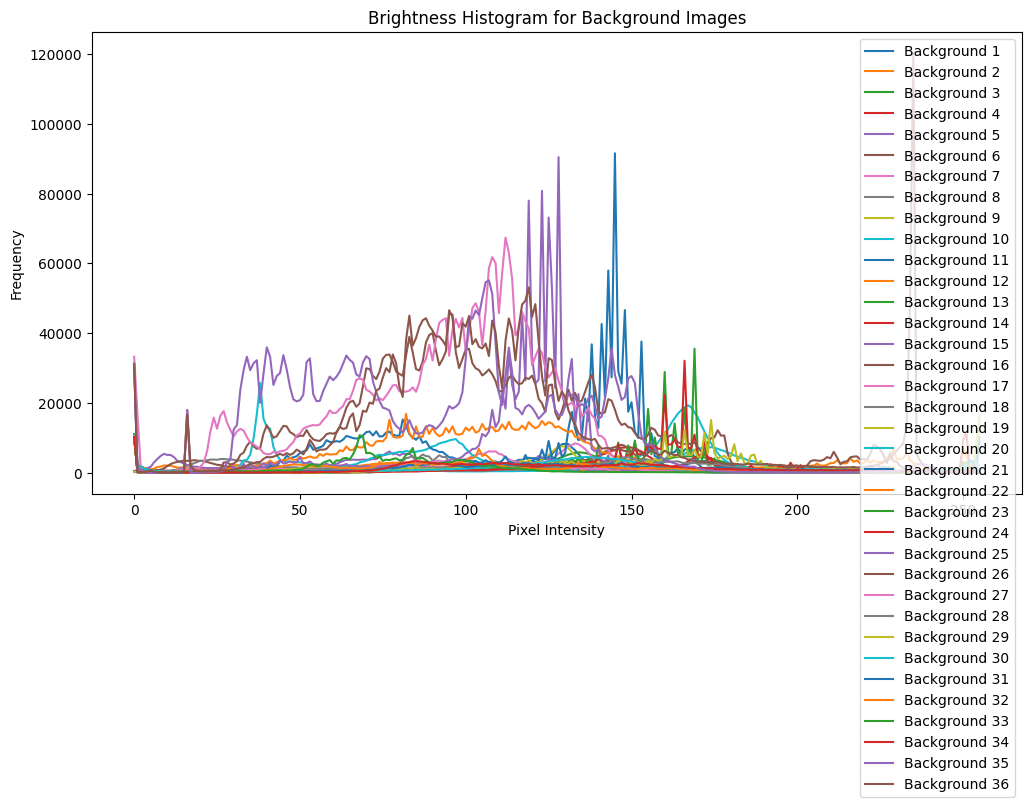

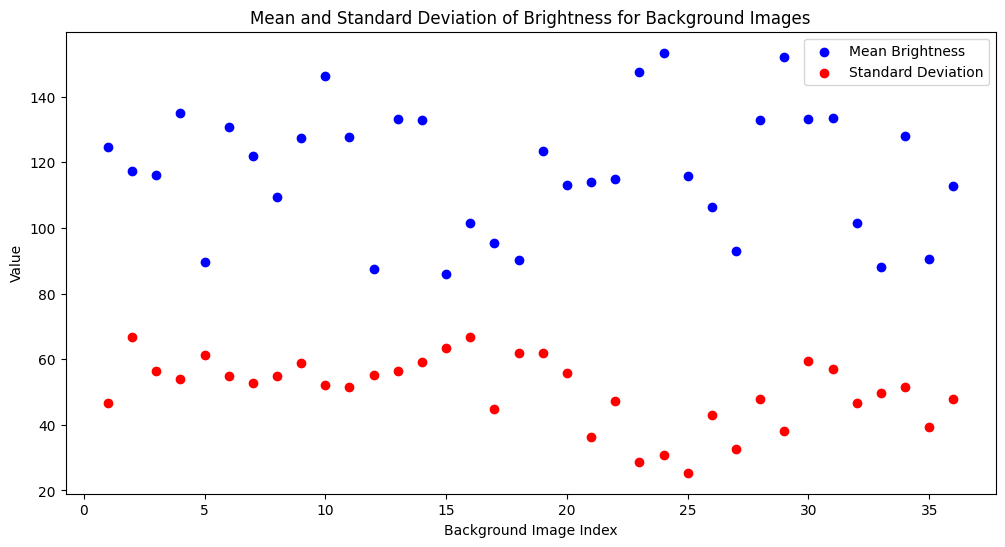

([124.76591471354166,
  117.41530598958333,
  116.14107096354167,
  135.056103515625,
  89.72755859375,
  130.88776041666668,
  121.79511067708333,
  109.462734375,
  127.51789713541666,
  146.17357747395835,
  127.60155924479167,
  87.57940755208334,
  133.17585611979166,
  132.73817708333334,
  86.018212890625,
  101.43229817708334,
  95.517685546875,
  90.17182291666667,
  123.30494791666666,
  113.22235134548612,
  114.11048954046639,
  114.77082142584972,
  147.42149522569446,
  153.3758631234217,
  115.88830780368846,
  106.26652113596599,
  93.05002625783284,
  132.912373046875,
  152.03024631076389,
  133.200400390625,
  133.53109700520832,
  101.42195638020833,
  88.18345703125,
  127.92654296875,
  90.46724319458008,
  112.88554286956787],
 [46.51923828106537,
  66.67801919366882,
  56.29505231135728,
  53.87954568192207,
  61.343870836635574,
  54.96226309492283,
  52.83628507347346,
  54.87370778966639,
  58.766122887457826,
  52.08166136884133,
  51.49295718976411,
  55.15

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the background images directory
backgrounds_dir = '/content/drive/MyDrive/Colab Notebooks/backgrounds'

# Initialize lists to store histogram data and mean/std values
brightness_histograms = []
mean_values = []
std_values = []

# Process each background image
for file_name in os.listdir(backgrounds_dir):
    if not file_name.endswith('.jpg'):
        continue

    # Load the image in grayscale to analyze brightness
    image_path = os.path.join(backgrounds_dir, file_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the histogram of the brightness levels (256 bins for 0-255 range)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    brightness_histograms.append(hist.flatten())

    # Calculate the mean and standard deviation of pixel values
    mean_val = np.mean(image)
    std_val = np.std(image)
    mean_values.append(mean_val)
    std_values.append(std_val)

# Plot histogram for each image
plt.figure(figsize=(12, 6))
for idx, hist in enumerate(brightness_histograms):
    plt.plot(hist, label=f'Background {idx+1}')
plt.title('Brightness Histogram for Background Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot mean and standard deviation values
plt.figure(figsize=(12, 6))
plt.scatter(range(1, len(mean_values) + 1), mean_values, label='Mean Brightness', color='blue')
plt.scatter(range(1, len(std_values) + 1), std_values, label='Standard Deviation', color='red')
plt.title('Mean and Standard Deviation of Brightness for Background Images')
plt.xlabel('Background Image Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the computed mean and standard deviation values
mean_values, std_values

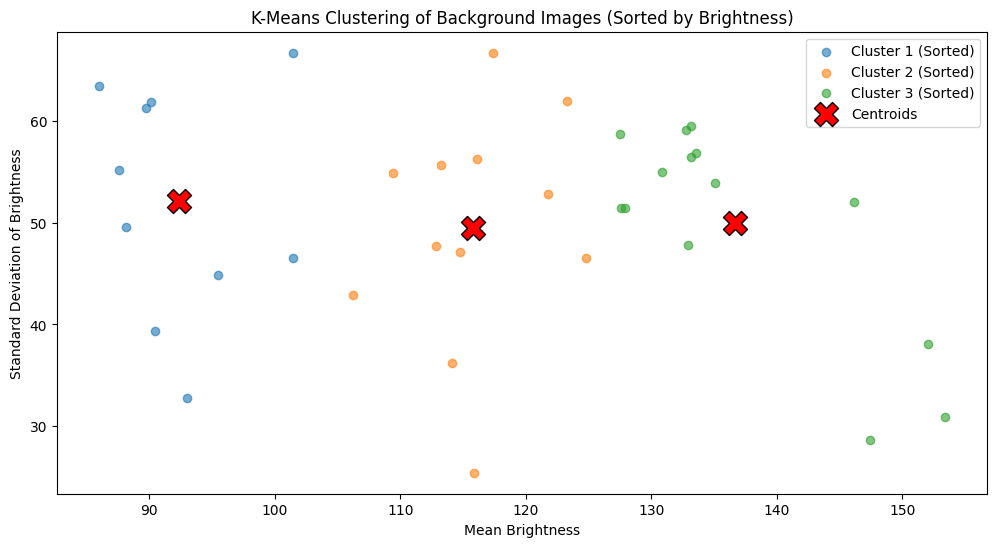

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Verify that mean_values and std_values have been calculated correctly
if len(mean_values) != len(std_values):
    print("Mismatch in length of mean and standard deviation lists.")
else:
    # Prepare the data for clustering
    data_for_clustering = np.array(list(zip(mean_values, std_values)))

    # Perform K-Means clustering with a specified number of clusters, e.g., K=3
    k = 3  # You can adjust this value based on your requirements
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_for_clustering)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the average brightness for each cluster
    cluster_brightness = [np.mean(data_for_clustering[labels == i, 0]) for i in range(k)]

    # Sort clusters by brightness and get the new order
    sorted_indices = np.argsort(cluster_brightness)

    # Create a mapping from original cluster index to sorted index
    cluster_map = {original: sorted_idx for sorted_idx, original in enumerate(sorted_indices)}

    # Reorder the labels based on the new cluster mapping
    sorted_labels = np.array([cluster_map[label] for label in labels])
    plt.figure(figsize=(12, 6))
    for i in range(k):
        plt.scatter(data_for_clustering[sorted_labels == i, 0], data_for_clustering[sorted_labels == i, 1], label=f'Cluster {i+1} (Sorted)', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids', edgecolors='black')
    plt.title(f'K-Means Clustering of Background Images (Sorted by Brightness)')
    plt.xlabel('Mean Brightness')
    plt.ylabel('Standard Deviation of Brightness')
    plt.legend()
    plt.show()

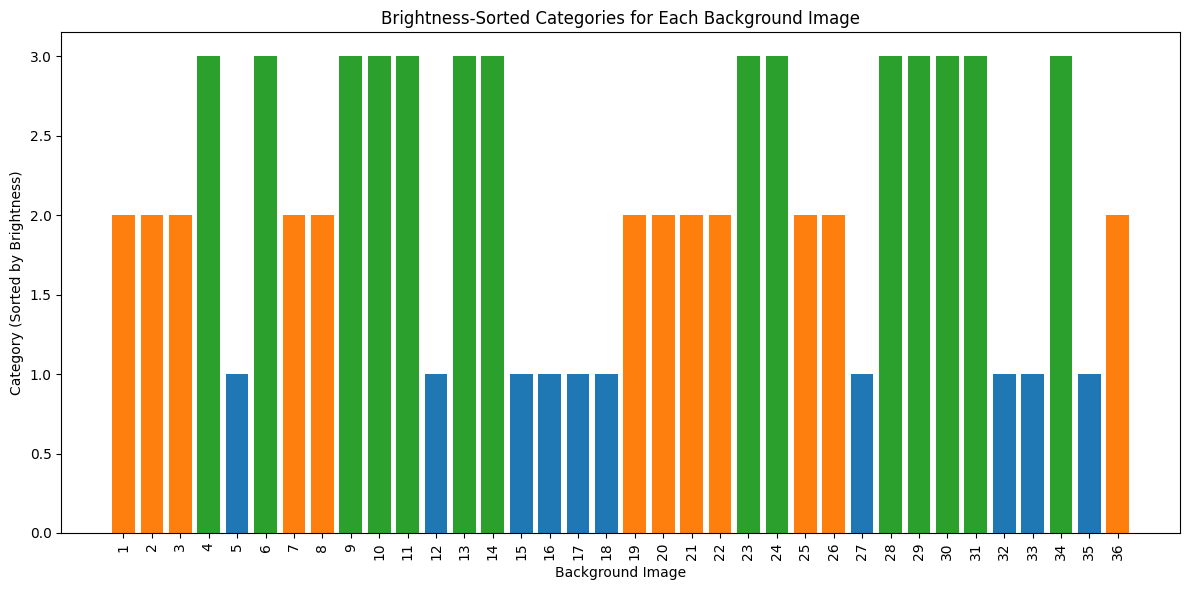

In [7]:
# Plotting the categories for each background image based on the sorted brightness
plt.figure(figsize=(12, 6))
for i, label in enumerate(sorted_labels):
    plt.bar(f'{i+1}', label + 1, color=f'C{label}')  # Assign a different color for each category

plt.title('Brightness-Sorted Categories for Each Background Image')
plt.xlabel('Background Image')
plt.ylabel('Category (Sorted by Brightness)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [10]:
for i, label in enumerate(sorted_labels):
    print(f'{i+1}: ', label + 1)

1:  2
2:  2
3:  2
4:  3
5:  1
6:  3
7:  2
8:  2
9:  3
10:  3
11:  3
12:  1
13:  3
14:  3
15:  1
16:  1
17:  1
18:  1
19:  2
20:  2
21:  2
22:  2
23:  3
24:  3
25:  2
26:  2
27:  1
28:  3
29:  3
30:  3
31:  3
32:  1
33:  1
34:  3
35:  1
36:  2
